<a href="https://colab.research.google.com/github/KyoungHa-Park/Data-Analysis/blob/master/6.%20Web%20Crawling/200819_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%B0%A9%EC%86%A1_text_%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+ 진행방법 : Web 정보 수집(time delay 기반) 
+ ~~2안 : 동영상 형태에 기반하여 parsing
  $\to$ 반응형 Web으로 보이기 때문에, 동영상이 아님~~
  
+ Issue
  + 관리자 글(답변)은 수집하지 않음
  + 0.5초 이내 2껀이상 작성된 글은 마지막 1껀만 가져옴
  + 실시간 정보에 대한 추적이 아니며, 종료 후, 모든 내용을 보아야 함(=자동 수집 불가)


In [ ]:
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import selenium.webdriver as webdriver
from time import sleep
import pandas as pd
from bs4 import BeautifulSoup

from selenium import webdriver
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from skimage import io

In [ ]:
# -*- coding=utf-8 -*-
# options = webdriver.ChromeOptions()
# options.add_argument('headless')
# options.add_argument('disable-gpu')
driver = webdriver.Chrome('C:/Users/MAEIL/Downloads/chromedriver/chromedriver.exe')
# driver = webdriver.Chrome('C:/Users/MAEIL/Downloads/chromedriver/chromedriver.exe')

url = 'https://mall.saucelive.net/broadcast/9899?serviceId=lotte&sessionKey=&planId=****'

driver.get(url)
driver.implicitly_wait(5)
bsObj = BeautifulSoup(driver.page_source, "lxml")

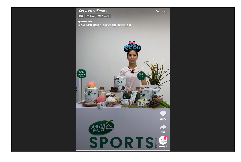

In [ ]:
# 화면확인1
driver.save_screenshot('page1.png')

plt.figure(figsize=(4,4))

img1 = io.imread('./page1.png')
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.show()

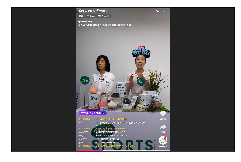

In [ ]:
# 화면확인 2
driver.save_screenshot('page2.png')

plt.figure(figsize=(4,4))

img1 = io.imread('./page2.png')
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# 현황 확인
currentTime = bsObj.find_all('span', class_ ='video-play-current-time')[0].text
endTime = bsObj.find_all('span', class_ ='video-play-duration-time')[0].text
heart = bsObj.find_all('button', class_ ='heart-button')[0].text

print('현재시점 : {}'.format(currentTime) )
print('종료시점 : {}'.format(endTime) )
print('좋아요 수 : {}'.format(heart) )

현재시점 : 00:17:17
종료시점 : 01:11:45
좋아요 수 : 22472


In [ ]:
# 1차 : 구조확인
bsObj = BeautifulSoup(driver.page_source, "lxml")
text = bsObj.find_all('div', class_ ='chat-box-list')[0].text

len(bsObj.find_all('span', class_ ='chat-message-user-nickname'))

for i in range(0,len(bsObj.find_all('span', class_ ='chat-message-user-nickname'))):
    nick = bsObj.find_all('span', class_ ='chat-message-user-nickname')[i].text
    message = bsObj.find_all('span', class_ ='chat-message')[i].text
    print(i, nick, message)

0 dbfl**** 종류가 3가지인데 차이점은 뭔가요??
1 geld**** 몸짱 되고 싶어요!!!!
2 sijm**** 셀렉스 구입하고왔어요
3 jong**** 하루에 몇 번정도 먹어야 하나요?
4 dls9****  칼로리 궁금해여~!~!~
5 **** 우유와 타먹어도 되나요?
6 gkqr**** 구매완료 했어요!
7 chem**** 체중 감량용으로 먹으려면 어느 제품이 좋나요
8 moi_**** 구매했어용💪💪 초록색덤벨탐나네여
9 reds**** 언제 섭취하는게 가장 좋을까요? 
10 mm99**** 먹으면 몸짱되나여?????
11 envy**** 프로틴바는 따로 구입 안되나요?
12 uunn**** 셀렉스 스포츠 슬림 세가지 다 구입ㅋㅋㅋㅋ
13 geld**** 완판 언니 믿고 살거에요~~
14 mm99**** 예뻐질수 있나요???
15 **** 밥 대용으로 먹어도 된나욫?
16 nyzz**** 복근미녀가 될 수 있나요?
17 toa_**** 구매했어요!
18 **** 아이들도 뛰어놀게 하고 먹여도 되나요?
19 geld**** 공복에 먹어도 되는건거요?????
20 uunn**** 밥 대용은 슬립25인거같던데 아닌가;
21 swee**** 셀렉스 스포츠 제조법 알려주세요 
22 swee**** 우유몇미리 몇스푼인지
23 **** 성인 외에 아이들도 먹여도 되나요
24 mm99**** 예뻐지려면 얼마나 먹어야되여?
25 envy**** 프로틴바도 따로 구입가능한가요?
26 libb**** 다이어트식으로 구성을 짠다면 어떻게 먹는게 젤좋을까요~??
27 mm99**** 엄청 고운가루다
28 geld**** 공복에 먹어도 되나요!!???
29 envy**** 프로틴바 구입방법 알려주세요
30 dbfl**** 슬리25. 음료. 쉐이크 3가지 차이점좀 알려주세요
31 kind**** 구매인증 바로뽑나여??
32 heav**** 언뉘 모유수유하는데 먹어도 되나요??????
33 uunn**** 스포츠 가루샀어요^^ 간편하게
34 geld**** 공복에 먹어도 되나

In [ ]:
url = 'https://mall.saucelive.net/broadcast/9899?serviceId=lotte&sessionKey=&planId=****'

driver.get(url)

driver.implicitly_wait(5)
bsObj = BeautifulSoup(driver.page_source, "lxml")
currentTime = bsObj.find_all('span', class_ ='video-play-current-time')[0].text
length = len(bsObj.find_all('div', class_ ='chat-box-list'))


In [ ]:
#처음 메시지 - 비교를 위한 하드코딩
message = '안녕하세요!!!'

# 반복문(계속 결과 출력)
# 0.5초 마다 마지막 text가 다른 경우, 결과를 출력함  
while True:
    bsObj = BeautifulSoup(driver.page_source, "lxml")
    currentTime = bsObj.find_all('span', class_ ='video-play-current-time')[0].text
    length = len(bsObj.find_all('div', class_ ='chat-box-list'))
    if message == bsObj.find_all('span', class_ ='chat-message')[-1].text:
        pass
    else:
        message = bsObj.find_all('span', class_ ='chat-message')[-1].text
        user = bsObj.find_all('span', class_ ='chat-message-user-nickname')[-1].text
        # print(currentTime +"\t" + user +"\t"+ message)
        print(currentTime, user, message)
    time.sleep(0.5)

00:01:00 pimp**** 기다렸어요~~!!! 이방송
00:01:02 sijm**** 셀렉스 사러왔어요.
00:01:12 moi_**** 안녕하세용~~
00:01:13 pimp**** 완판언니!!! 
00:01:18 mm99**** 완판언니 귀여워🙊
00:01:22 ******** 너무 예뻐요 완판언니◇
00:01:25 reds**** 꺄ㅑㅑㅑ
00:01:31 banp**** 완판언니 안녕하세요~~^^
00:01:34 reds**** 완판언니래 ㅋㅋㅋ
00:01:37 pimp**** 올블랑 방가워요!!!
00:01:39 nyzz**** 소리가 좀 끊겨용
00:01:43 go-s**** 기대되요!
00:01:46 hjho**** 셀렉스 굿
00:01:47 ******** 다들 몸짱들이심!!
00:01:59 sijm**** 소리가 안들려요
00:02:01 youn**** 계속 마이크 건드리는 소리가 나요
00:02:04 gkqr**** ㄱ ㄱ ㅑ 올블랑이다!!
00:02:06 banp**** 소리가 잘 안들려요~~
00:02:10 go-s**** 셀렉스다
00:02:23 savi**** 안녕하세요~~~~
00:02:25 ******** 이거 맛있나요? 
00:02:41 toa_**** 시작한겅가요?? 멈춰이
00:02:45 toa_**** 있는데
00:02:59 youn**** 저는 엄마 두박스 저 한박스 정기구매 해서 먹어요 맛있는데 파란색은 밍밍하데요
00:03:05 moi_**** 셀렉스사고왔어요!!!
00:03:13 gkqr**** 소리 보니깐 상단 오른쪽에 스피커모양 누르면 들려요 
00:03:15 ******** 복숭아맛 어때요?
00:03:24 nevu**** 선구매 후시청!!
00:03:27 moi_**** 복숭아맛진짜궁금
00:03:32 jdfr**** 맛이 괜찮나요??
00:03:53 ******** 완판언니 얼굴 소멸직전
00:04:15 임호균 셀렉스 최고! 완전 좋은 제품 추천 🧡
00:04:16 lott**** 굿
00:04:33 ve

00:27:06 eunh**** 주문완료했어요
00:27:18 shal**** 복숭아맛 궁금해요
00:27:23 capp**** 당뇨있어도
00:27:28 geld**** 타바타 운동 하고 먹어도 근력 향상에 도움이 있나요!!?
00:27:32 임호균 요즘 운동갈 때 마다 저 새지 않는 텀블러에 타서 가는데 너무 좋아요
00:27:34 jiha**** 인증어케해요?
00:27:39 ilsa**** 구매인증 어떻게 하나요?
00:27:46 mm99**** 복숭아가 원픽인가요?????
00:27:54 caru**** 인증어떻게 하나요?
00:27:55 capp**** 먹어도되죠??
00:27:57 max2**** 운동전에도 먹어도 문제는 없나요
00:28:04 eunh**** 주문완료했어요
00:28:07 leet**** 1+1 방송중 추첨인가요? 
00:28:08 jiha**** 운동하고 단백질 셀렉스로 채워요 ㅎ
00:28:17 ******** 두가지 맛 다 사길 잘했네요^^
00:28:20 oh21**** 단백질 몇년전에 먹어보고 역해서 다 버렸는데 이번에 올블랑 완판언니 믿고 다시 먹어봐야겠음
00:28:22 caru**** 인증어떻게 해요?
00:28:23 capp**** 노인들도 먹어도 되나요
00:28:25 leet**** 방금 구매하고 왔는데.. ㅠ
00:28:33 ******** 완판언니 한잔 마시고 하세요ㅋㅋ
00:28:40 oh21**** 운동한다 ㅋㅋㅋㅋ  보고가야지
00:28:43 pkhh**** 구매했어요~~
00:28:48 ilsa**** 구매완료
00:28:53 jiha**** 구매했어용
00:28:55 heav**** 구매했어요 ㅎㅎ
00:29:01 leet**** 구매완료!
00:29:05 sijm**** 방송보다가 셀렉스 마시러가요
00:29:21 envy**** 구매했습니다
00:29:22 eunh**** 아침에 공복 운동하고 식사대용으로 먹으려고 복숭아맛으로 
00:29:39 eunh**** 주문했어요
00:29:44 pimp

01:07:36 mypa**** 자주 이런 기회 있음 좋겠어요♥
01:07:46 gewo**** 최저가보다 싸요
01:07:56 pimp**** 최저가완전 혜택 좋아요
01:08:00 gewo**** 사재기
01:08:05 mm99**** 올블랑도 주나요?
01:08:08 pimp**** 찾아보고 왔어요
01:08:42 gewo**** 부모님도 좋아하는 셀렉스
01:08:46 reds**** ㅋㅋㅋㅋㅋㅋ
01:08:50 leet**** 하루 1회만 섭취하나요? 
01:09:16 oh21**** 모두의 것 ㅋㅋㅋㅋ
01:09:28 gewo**** 부모님 선물할려고  구매했어요
01:09:34 pimp**** 올블랑 너므 좋아요!!
01:09:35 libb**** 홈트레이닝은 1주에 몇번, 몇분이상 하는게 좋은가요?
01:09:50 ******** 포만감 있나요?
01:09:57 ******** 좋네요!!!
01:10:01 reds**** 어머 벌써 ... 방송 끝인가요? 아쉬워랑 ㅜㅜ 
01:10:04 gewo**** 너무 좋아요
01:10:07 pimp**** 아직 끝내지 말아요!!!
01:10:08 mypa**** 좋아요~~~
01:10:10 ******** 가지마세요ㅠㅠㅠㅠ
01:10:12 mm99**** 다음에 또 봐요!!!!!!!재밌어 ㅋㅋㅋㅋㅋㅋㅋㅋ
01:10:15 pimp**** 더 보고 싶어요~~~
01:10:16 gewo**** 안끝났으면
01:10:31 gewo**** 시간순삭
01:10:42 pimp**** 진짜 재밋다
01:10:44 reds**** 시간 순삭
01:10:47 libb**** 또진행해주세요~~~~!!!!!!
01:11:01 mypa**** 당첨됐음 좋겠어요~~~^^
01:11:03 pimp**** 이번 완전 재미있었어요!!!
01:11:04 libb**** 다먹기전에 다시겟겟
01:11:09 ******** 또 진행해 주세요!
01:11:11 reds**** 당첨 기대합니다!! 
01:11:16 mm99**** 안녕~~~~~

KeyboardInterrupt: 

In [ ]:
driver.close()